In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import statsmodels.api as sm

In [4]:
#Load Data
dataset = pd.read_csv(r'../../data/processed/charity_main_cleaned.csv')
la_2025_asset_summary = pd.read_csv(r'../../data/processed/la_2025_asset_summary.csv')
population_summary = pd.read_csv(r'../../data/processed/population_summary_by_la.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_22808\696023224.py:2: DtypeWarning: Columns (25,29,32,42) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(r'../../data/processed/charity_main_cleaned.csv')


In [ ]:
#Charity Summary
charity_summary = dataset.groupby('local_authority').agg(
    total_charities=('registered_charity_number', 'count'),
    percent_land_holding=('charity_has_land', 'mean'),
    median_income=('latestIncome', 'median'),
    removal_rate=('charity_status', lambda x: (x == 'inactive').mean()),
).reset_index()

Total number of charity data: 351,959
Total number of charities removed: 180,968
Number of charities removed per year:
1961.0: 295
1962.0: 91
1963.0: 89
1964.0: 116
1965.0: 96
1966.0: 106
1967.0: 87
1968.0: 83
1969.0: 59
1970.0: 79
1971.0: 81
1972.0: 124
1973.0: 141
1974.0: 143
1975.0: 133
1976.0: 119
1977.0: 188
1978.0: 152
1979.0: 123
1980.0: 145
1981.0: 124
1982.0: 153
1983.0: 142
1984.0: 157
1985.0: 141
1986.0: 157
1987.0: 184
1988.0: 253
1989.0: 208
1990.0: 135
1991.0: 4,921
1992.0: 11,406
1993.0: 6,826
1994.0: 3,640
1995.0: 4,365
1996.0: 7,801
1997.0: 5,286
1998.0: 3,463
1999.0: 3,562
2000.0: 8,636
2001.0: 4,802
2002.0: 3,872
2003.0: 3,673
2004.0: 4,620
2005.0: 4,086
2006.0: 3,721
2007.0: 4,011
2008.0: 5,575
2009.0: 12,395
2010.0: 5,588
2011.0: 6,198
2012.0: 4,066
2013.0: 4,157
2014.0: 3,859
2015.0: 4,326
2016.0: 4,055
2017.0: 4,215
2018.0: 4,957
2019.0: 5,780
2020.0: 3,812
2021.0: 3,592
2022.0: 5,534
2023.0: 4,221
2024.0: 4,083
2025.0: 1,760


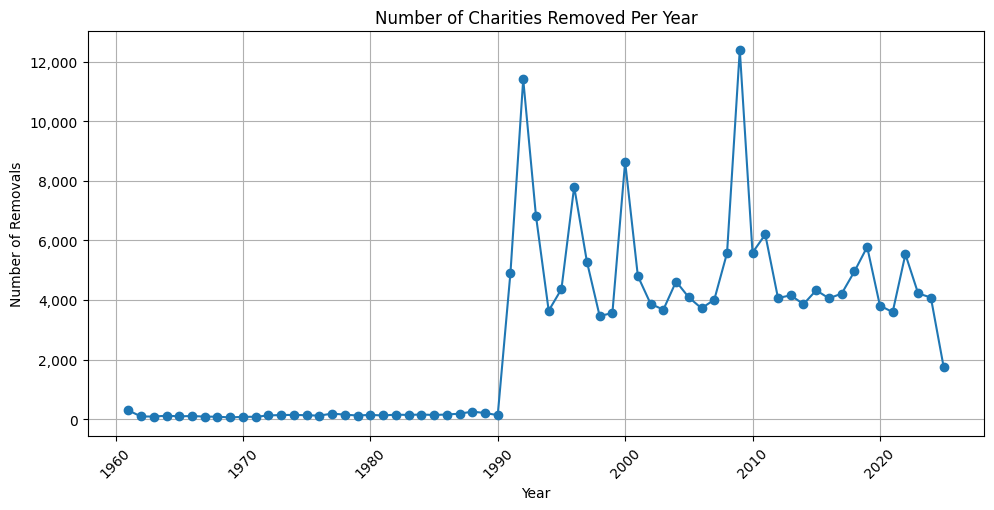

In [8]:
dataset['date_of_removal'] = pd.to_datetime(dataset['date_of_removal'], errors='coerce')
removed_by_year = dataset['date_of_removal'].dt.year.value_counts().sort_index()
print(f'Total number of charity data: {dataset['charity_status'].count():,}')
print(f"Total number of charities removed: {removed_by_year.sum():,}")
print("Number of charities removed per year:")
for year, count in removed_by_year.items():
    print(f"{year}: {count:,}")

plt.figure(figsize=(10, 5))
plt.plot(removed_by_year.index, removed_by_year.values, marker='o', linestyle='-')
plt.title('Number of Charities Removed Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Removals')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

['IP28 6RD' 'BS16 2HH' 'NAN' 'N19 5NJ' 'S10 3TG' 'SY16 2EH' 'M3 6FA'
 'AL4 8FJ' 'E13 8AQ' 'CM6 2QY']


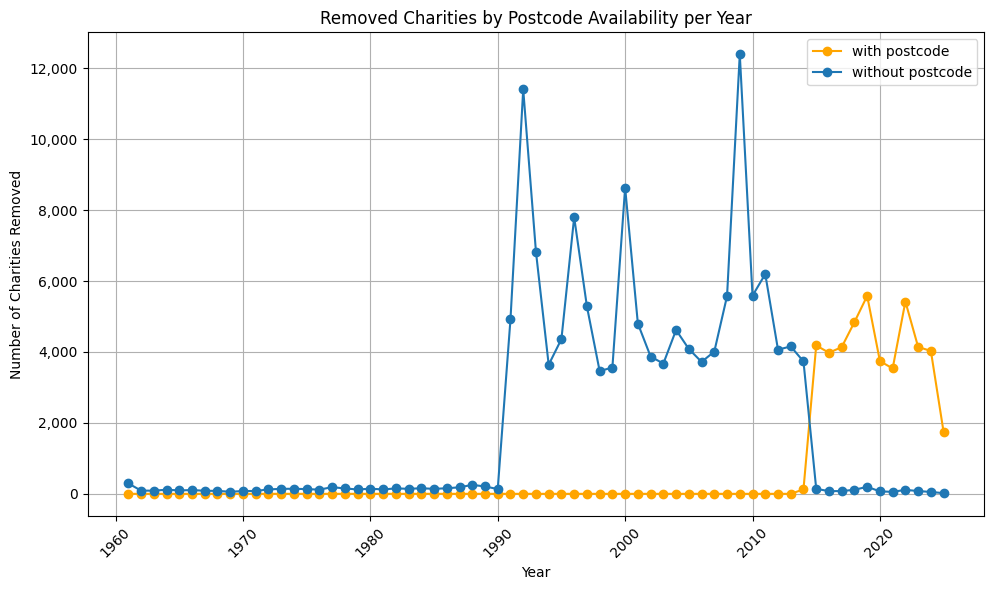

In [19]:
# Ensure datetime conversion
dataset['date_of_removal'] = pd.to_datetime(dataset['date_of_removal'], errors='coerce')

# Filter removed charities
removed = dataset[dataset['date_of_removal'].notnull()].copy()

# Create postcode status category
def classify_postcode(x):
    if pd.isnull(x):
        return 'without postcode'
    x_str = str(x).strip().lower()
    return 'with postcode' if x_str not in ['', 'nan', 'none'] else 'without postcode'

removed['postcode_status'] = removed['postcode'].apply(classify_postcode)

# Extract year of removal
removed['removal_year'] = removed['date_of_removal'].dt.year

# Group by year and postcode status
removed_by_year_postcode = (
    removed.groupby(['removal_year', 'postcode_status'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# Plotting
plt.figure(figsize=(10, 6))
color_map = {
    'without postcode': '#1f77b4',
    'with postcode': 'orange'
}
for category in removed_by_year_postcode.columns:
    plt.plot(
        removed_by_year_postcode.index,
        removed_by_year_postcode[category],
        marker='o',
        label=category,
        color=color_map.get(category, 'grey')  # fallback colour if unexpected category
    )
plt.title('Removed Charities by Postcode Availability per Year')
plt.xlabel('Year')
plt.ylabel('Number of Charities Removed')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_22808\3162599160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive['removed_by_year'] = inactive['date_of_removal'].dt.year
C:\Users\User\AppData\Local\Temp\ipykernel_22808\3162599160.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive['land_category'] = inactive['charity_has_land'].map({True: 'with land', False: 'without land'})
C:\Users\User\AppData\Local\Temp\ipykernel_22808\3162599160.py:7: SettingWithCopyWarning: 
A value is trying to be se

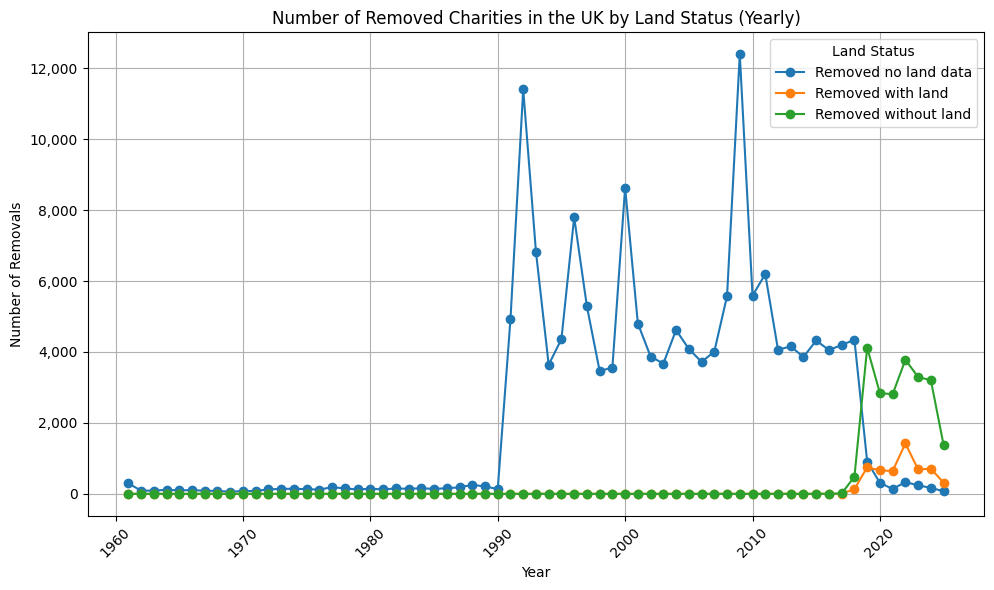

In [20]:
dataset['date_of_removal'] = pd.to_datetime(dataset['date_of_removal'], errors='coerce')
inactive = dataset[dataset['charity_status'] == 'inactive']
removed_by_year = dataset['date_of_removal'].dt.year.value_counts().sort_index()
inactive['removed_by_year'] = inactive['date_of_removal'].dt.year

inactive['land_category'] = inactive['charity_has_land'].map({True: 'with land', False: 'without land'})
inactive['land_category'] = inactive['land_category'].fillna('no land data')

# Group by year and land category
removed_by_year_land = (
    inactive
    .groupby(['removed_by_year', 'land_category'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# Plotting
plt.figure(figsize=(10, 6))
for column in removed_by_year_land.columns:
    plt.plot(removed_by_year_land.index, removed_by_year_land[column], marker='o', label=f"Removed {column}")

plt.title('Number of Removed Charities in the UK by Land Status (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Removals')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Land Status')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_22808\992193523.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed['age_at_removal'] = (removed['date_of_removal'] - removed['date_of_registration']).dt.days // 365
C:\Users\User\AppData\Local\Temp\ipykernel_22808\992193523.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed['age_category'] = pd.cut(removed['age_at_removal'], bins=bins, labels=labels, right=True)
C:\Users\User\AppData\Local\Temp\ipykernel_22808\992193523.py:14: SettingWithCopyWarn

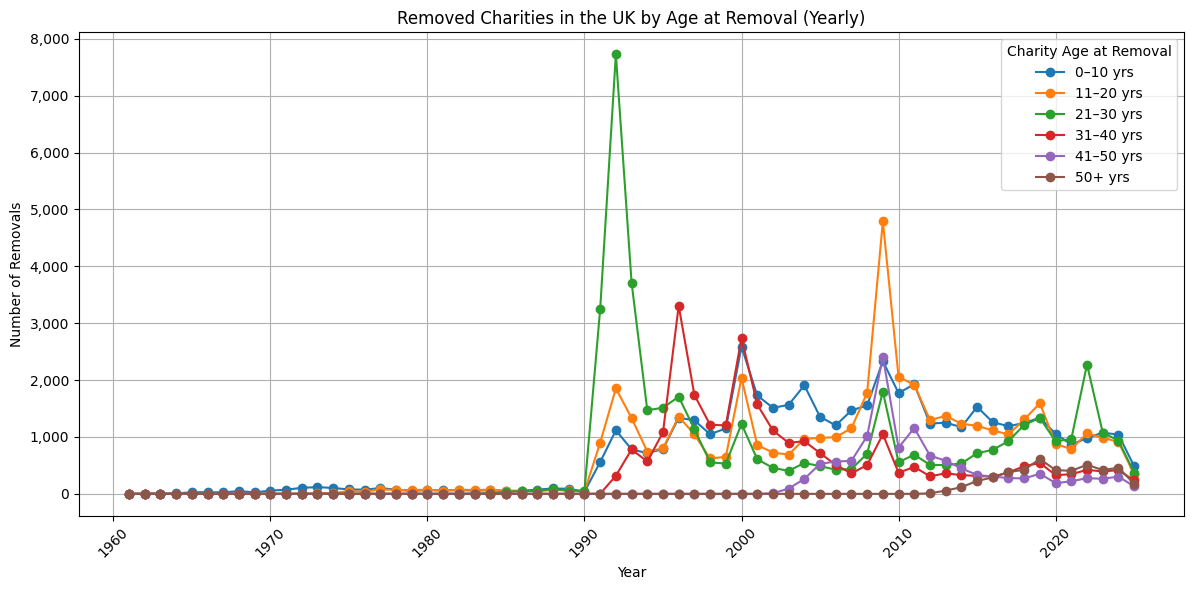

In [21]:
dataset['date_of_registration'] = pd.to_datetime(dataset['date_of_registration'], errors='coerce')
dataset['date_of_removal'] = pd.to_datetime(dataset['date_of_removal'], errors='coerce')

removed = dataset[dataset['date_of_removal'].notnull()]

removed['age_at_removal'] = (removed['date_of_removal'] - removed['date_of_registration']).dt.days // 365

# Bin into age categories
bins = [0, 10, 20, 30, 40, 50, 1000]
labels = ['0–10 yrs', '11–20 yrs', '21–30 yrs', '31–40 yrs', '41–50 yrs', '50+ yrs']
removed['age_category'] = pd.cut(removed['age_at_removal'], bins=bins, labels=labels, right=True)

# Add year column
removed['year'] = removed['date_of_removal'].dt.year

# Group by year and age category
removed_by_year_age = (
    removed
    .groupby(['year', 'age_category'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# Plotting
plt.figure(figsize=(12, 6))
for column in removed_by_year_age.columns:
    plt.plot(removed_by_year_age.index, removed_by_year_age[column], marker='o', label=f"{column}")

plt.title('Removed Charities in the UK by Age at Removal (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Removals')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Charity Age at Removal')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()


In [22]:
dataset['date_of_removal'] = pd.to_datetime(dataset['date_of_removal'], errors='coerce')

dataset['removal_year'] = dataset['date_of_removal'].dt.year

removed = dataset[dataset['removal_year'].notnull() & dataset['local_authority'].notnull()]

removed_by_year_la = (
    removed
    .groupby(['local_authority', 'removal_year'])
    .size()
    .unstack(fill_value=0)  # fills missing years with 0
    .sort_index(axis=1)     # ensure years are in order
)
removed_by_year_la['Total'] = removed_by_year_la.sum(axis=1)
removed_by_year_la = removed_by_year_la.sort_values(by='Total', ascending=False)

# Display
print("Removed Charities per Year per Local Authority:")
print(removed_by_year_la.head(10))

Removed Charities per Year per Local Authority:
removal_year     2014.0  2015.0  2016.0  2017.0  2018.0  2019.0  2020.0  \
local_authority                                                           
North Yorkshire       2      59      74      88      88      99      58   
Westminster           2      81      66      80      80     106      67   
Birmingham            3      68      50      53      70      98      39   
Somerset              1      54      61      62      66      69      61   
Cornwall              3      39      54      55      66      69      38   
Buckinghamshire       1      39      55      56      61      73      45   
Camden                1      46      46      48      49      80      46   
Wiltshire             2      47      43      54      63      64      63   
Barnet                2      53      41      46      48      68      44   
Dorset                0      44      54      38      54      43      23   

removal_year     2021.0  2022.0  2023.0  2024.0  20